In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("501.csv")

df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [2]:
df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [3]:
df = df.sample(frac = 0.1)

Text(0.5, 1.0, 'Label')

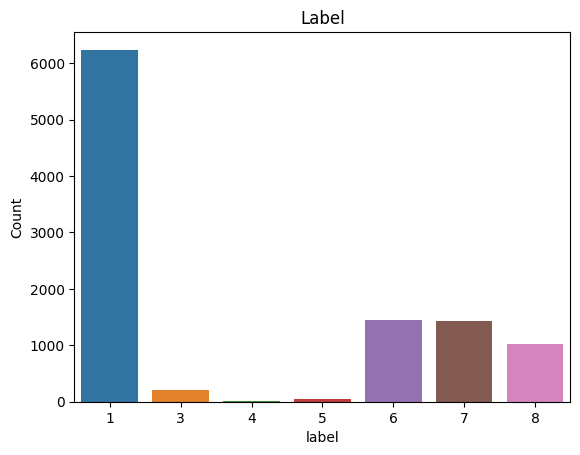

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="label")
plt.xlabel("label")
plt.ylabel("Count")
plt.title("Label")

In [5]:
y = df['label']
X = df.drop('label', axis=1)
X = X.drop('timestamp', axis=1)

y

23929    8
47612    1
69529    1
74427    1
74817    1
        ..
21921    8
75471    1
8681     7
10524    7
3608     6
Name: label, Length: 10386, dtype: int64

In [6]:
from keras.utils import to_categorical

y = to_categorical(y)
y

2023-05-26 11:20:53.595723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape

(8308, 6)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(100,input_shape=(6,),activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(9,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               700       
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dense_3 (Dense)             (None, 9)                 549       
                                                                 
Total params: 14,189
Trainable params: 14,189
Non-trainable params: 0
_________________________________________________________________


2023-05-26 11:20:56.017894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=4, validation_data= (X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
2077/2077 [==============================] - 2s 757us/step - loss: 0.5761 - accuracy: 0.8297 - val_loss: 0.3749 - val_accuracy: 0.8446
Epoch 2/100
2077/2077 [==============================] - 1s 695us/step - loss: 0.3999 - accuracy: 0.8686 - val_loss: 0.3677 - val_accuracy: 0.8710
Epoch 3/100
2077/2077 [==============================] - 1s 695us/step - loss: 0.4069 - accuracy: 0.8748 - val_loss: 0.3763 - val_accuracy: 0.8807
Epoch 4/100
2077/2077 [==============================] - 1s 680us/step - loss: 0.3661 - accuracy: 0.8832 - val_loss: 0.3171 - val_accuracy: 0.9172
Epoch 5/100
2077/2077 [==============================] - 1s 681us/step - loss: 0.3801 - accuracy: 0.8908 - val_loss: 0.3255 - val_accuracy: 0.8965
Epoch 6/100
2077/2077 [==============================] - 1s 681us/step - loss: 0.3132 - accuracy: 0.9095 - val_loss: 0.2497 - val_accuracy: 0.9408
Epoch 7/100
2077/2077 [==============================] - 1s 692us/step - loss: 0.5103 - accuracy: 0.8763 - val_loss: 0

2077/2077 [==============================] - 1s 695us/step - loss: 1.1793 - accuracy: 0.6021 - val_loss: 1.1943 - val_accuracy: 0.5958
Epoch 57/100
2077/2077 [==============================] - 1s 685us/step - loss: 1.1796 - accuracy: 0.6021 - val_loss: 1.1782 - val_accuracy: 0.5958
Epoch 58/100
2077/2077 [==============================] - 1s 685us/step - loss: 1.1794 - accuracy: 0.6021 - val_loss: 1.1766 - val_accuracy: 0.5958
Epoch 59/100
2077/2077 [==============================] - 1s 698us/step - loss: 1.1783 - accuracy: 0.6021 - val_loss: 1.1756 - val_accuracy: 0.5958
Epoch 60/100
2077/2077 [==============================] - 1s 685us/step - loss: 1.1786 - accuracy: 0.6021 - val_loss: 1.1783 - val_accuracy: 0.5958
Epoch 61/100
2077/2077 [==============================] - 1s 686us/step - loss: 1.1785 - accuracy: 0.6021 - val_loss: 1.1779 - val_accuracy: 0.5958
Epoch 62/100
2077/2077 [==============================] - 1s 685us/step - loss: 1.1784 - accuracy: 0.6021 - val_loss: 1.1801 

In [10]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           1       0.60      1.00      0.75      1238
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00       286
           7       0.00      0.00      0.00       299
           8       0.00      0.00      0.00       208

    accuracy                           0.60      2078
   macro avg       0.09      0.14      0.11      2078
weighted avg       0.35      0.60      0.44      2078

[[1238    0    0    0    0    0    0]
 [  39    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0]
 [   7    0    0    0    0    0    0]
 [ 286    0    0    0    0    0    0]
 [ 299    0    0    0    0    0    0]
 [ 208    0    0    0    0    0    0]]


/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yes/opt/anaconda3/envs/aiclass/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

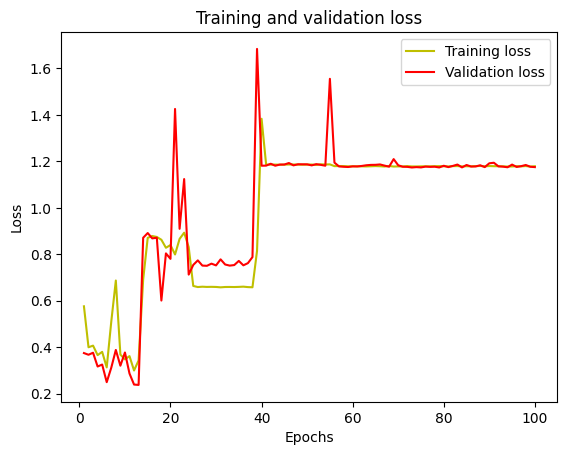

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()